In [1]:
# パッケージのimport
import os
import numpy as np
import datetime
import pandas as pd
import random
from matplotlib.backends.backend_pdf import PdfPages

# 可視化
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# 日本語対応フォントに変える
# （環境によって異なります。notebook内のみで有効な変更）
mpl.rcParams['font.family'] = 'HGMaruGothicMPRO'

# フォントサイズも大きめにしておく
mpl.rcParams['font.size'] = 12

In [3]:
df_tc = pd.read_csv("./data/title_category.csv")

In [4]:
category_type = df_tc.groupby("category_name").count().iloc[:, [0]].rename(
    columns={"film_id": "count"}).sort_values("count", ascending=False)

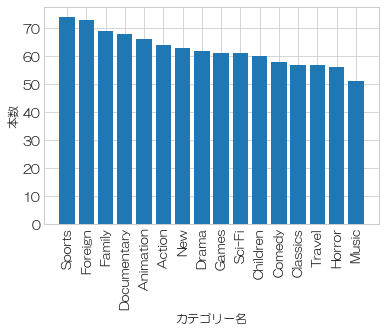

In [5]:
plt.bar(range(0,16),np.array(category_type["count"]))
plt.xticks(range(0,16),category_type.sort_values("count", ascending=False).index,rotation = 90)
plt.xlabel("カテゴリー名")
plt.ylabel("本数")
plt.show()

In [4]:
df_cd = pd.read_csv("./data/category_date_2.csv")

In [5]:
df_cd[df_cd.isnull().any(axis=1)]

,customer_id,rental_date,return_date,film_title,category_name
113,5,2006-02-14,NaN,Gables Metropolis,Family
235,9,2006-02-14,NaN,Deep Crusade,Documentary
288,11,2006-02-14,NaN,Bull Shawshank,Action
381,14,2006-02-14,NaN,Groundhog Uncut,Comedy
389,15,2006-02-14,NaN,Candidate Perdition,Classics
407,15,2006-02-14,NaN,Smoking Barbarella,Documentary
563,21,2006-02-14,NaN,Dwarfs Alter,Games
590,22,2006-02-14,NaN,Suit Walls,Games
626,23,2006-02-14,NaN,Divine Resurrection,Games
773,28,2006-02-14,NaN,Suspects Quills,Action


In [6]:
df_cd = df_cd.dropna(subset=["return_date"])

In [7]:
df_cd.groupby("film_title").count()

,customer_id,rental_date,return_date,category_name
film_title,,,,
Academy Dinosaur,22,22,22,22
Ace Goldfinger,6,6,6,6
Adaptation Holes,12,12,12,12
Affair Prejudice,22,22,22,22
African Egg,11,11,11,11
Agent Truman,21,21,21,21
Airplane Sierra,15,15,15,15
Airport Pollock,18,18,18,18
Alabama Devil,12,12,12,12


In [8]:
df_cd['rental_date'] = pd.to_datetime(df_cd['rental_date'])
df_cd['return_date'] = pd.to_datetime(df_cd['return_date'])

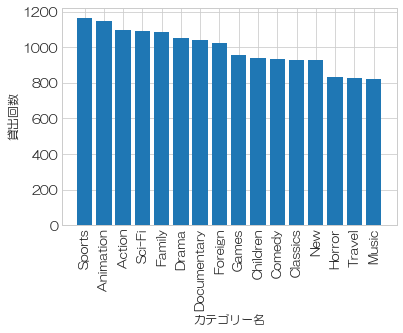

In [9]:
# 各カテゴリの貸出本数
plt.bar(range(0,16),np.array(df_cd.groupby("category_name").count().iloc[:,[0]].sort_values("customer_id", ascending=False)["customer_id"]))
plt.xticks(range(0,16),df_cd.groupby("category_name").count().iloc[:,[0]].sort_values("customer_id", ascending=False).index,rotation = 90)
plt.xlabel("カテゴリー名")
plt.ylabel("貸出回数")
plt.show()

In [10]:
# 同じ人に複数回レンタルされている作品を抽出
a = df_cd.groupby(["customer_id", "film_title", "category_name"]).count().iloc[:, [0]].sort_values("rental_date", ascending=False)[df_cd.groupby(["customer_id", "film_title", "category_name"]).count().iloc[:, [0]].sort_values("rental_date", ascending=False)["rental_date"] >= 2].reset_index()
a2 = a.groupby(["film_title","category_name"]).count().iloc[:,[0]].reset_index().sort_values(["category_name","film_title"]).rename(columns={"customer_id": "rental_num"})
a3 = a.groupby(["film_title","category_name"]).sum().iloc[:,[1]].reset_index().sort_values(["category_name","film_title"])
a2["rental_count"] = a3["rental_date"]
a2["mean"] = a2["rental_count"] / a2["rental_num"]

In [11]:
columns = ['Action', 'Animation', 'Children', 'Classics', 'Comedy',
           'Documentary', 'Drama', 'Family', 'Foreign', 'Games', 'Horror',
           'Music', 'New', 'Sci-Fi', 'Sports', 'Travel']

In [12]:
df_action = df_cd[df_cd["category_name"] == columns[0]].reset_index(drop = True)
df_animation = df_cd[df_cd["category_name"] == columns[1]].reset_index(drop = True)
df_children = df_cd[df_cd["category_name"] == columns[2]].reset_index(drop = True)
df_classics = df_cd[df_cd["category_name"] == columns[3]].reset_index(drop = True)
df_comedy = df_cd[df_cd["category_name"] == columns[4]].reset_index(drop = True)
df_documentary = df_cd[df_cd["category_name"] == columns[5]].reset_index(drop = True)
df_drama = df_cd[df_cd["category_name"] == columns[6]].reset_index(drop = True)
df_family = df_cd[df_cd["category_name"] == columns[7]].reset_index(drop = True)
df_foreign = df_cd[df_cd["category_name"] == columns[8]].reset_index(drop = True)
df_games = df_cd[df_cd["category_name"] == columns[9]].reset_index(drop = True)
df_horror = df_cd[df_cd["category_name"] == columns[10]].reset_index(drop = True)
df_music = df_cd[df_cd["category_name"] == columns[11]].reset_index(drop = True)
df_new = df_cd[df_cd["category_name"] == columns[12]].reset_index(drop = True)
df_schfi = df_cd[df_cd["category_name"] == columns[13]].reset_index(drop = True)
df_sports = df_cd[df_cd["category_name"] == columns[14]].reset_index(drop = True)
df_travel = df_cd[df_cd["category_name"] == columns[15]].reset_index(drop = True)

In [13]:
action = df_action.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})
animation = df_animation.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})
children = df_children.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})
classics = df_classics.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})
comedy = df_comedy.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})
documentary = df_documentary.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})
drama = df_drama.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})
family = df_family.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})
foreign = df_foreign.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})
games = df_games.groupby("film_title").count().iloc[:, [0]].sort_values("customer_id", ascending=False).rename(
    columns={"customer_id": "count"}).rename(columns={"customer_id": "count"})
horror = df_horror.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})
music = df_music.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})
new = df_new.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})
schfi = df_schfi.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})
sports = df_sports.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})
travel = df_travel.groupby("film_title").count().iloc[:, [0]].sort_values(
    "customer_id", ascending=False).rename(columns={"customer_id": "count"})

In [16]:
# レンタル回数20回以上
action.head(26).to_csv('action_t26.csv')
animation.head(26).to_csv('animation_t26.csv')
children.head(19).to_csv('children_t19.csv')
classics.head(21).to_csv('classics_t21.csv')
comedy.head(19).to_csv('comedy_t19.csv')
documentary.head(21).to_csv('documentary_t21.csv')
drama.head(23).to_csv('drama_t23.csv')
family.head(19).to_csv('family_t19.csv')
foreign.head(20).to_csv('foreign_t20.csv')
games.head(19).to_csv('games_t19.csv')
horror.head(18).to_csv('horror_t18.csv')
music.head(15).to_csv('music_t15.csv')
new.head(19).to_csv('new_t19.csv')
schfi.head(30).to_csv('schfi_t30.csv')
sports.head(20).to_csv('sports_t20.csv')
travel.head(13).to_csv('travel_t13.csv')

In [17]:
action.to_csv('action.csv')
animation.to_csv('animation.csv')
children.to_csv('children.csv')
classics.to_csv('classics.csv')
comedy.to_csv('comedy.csv')
documentary.to_csv('documentary.csv')
drama.to_csv('drama.csv')
family.to_csv('family.csv')
foreign.to_csv('foreign.csv')
games.to_csv('games.csv')
horror.to_csv('horror.csv')
music.to_csv('music.csv')
new.to_csv('new.csv')
schfi.to_csv('schfi.csv')
sports.to_csv('sports.csv')
travel.to_csv('travel.csv')
df_cd.iloc[:,[3,4]].sort_values("category_name").to_csv('df_cd.csv')
df_cd.groupby(["film_title","category_name"]).count().iloc[:,[0]].sort_values("customer_id", ascending=False).reset_index().to_csv("film_count.csv")
# 同一人物に複数回レンタルされている作品
a2.to_csv("rental_mean.csv")

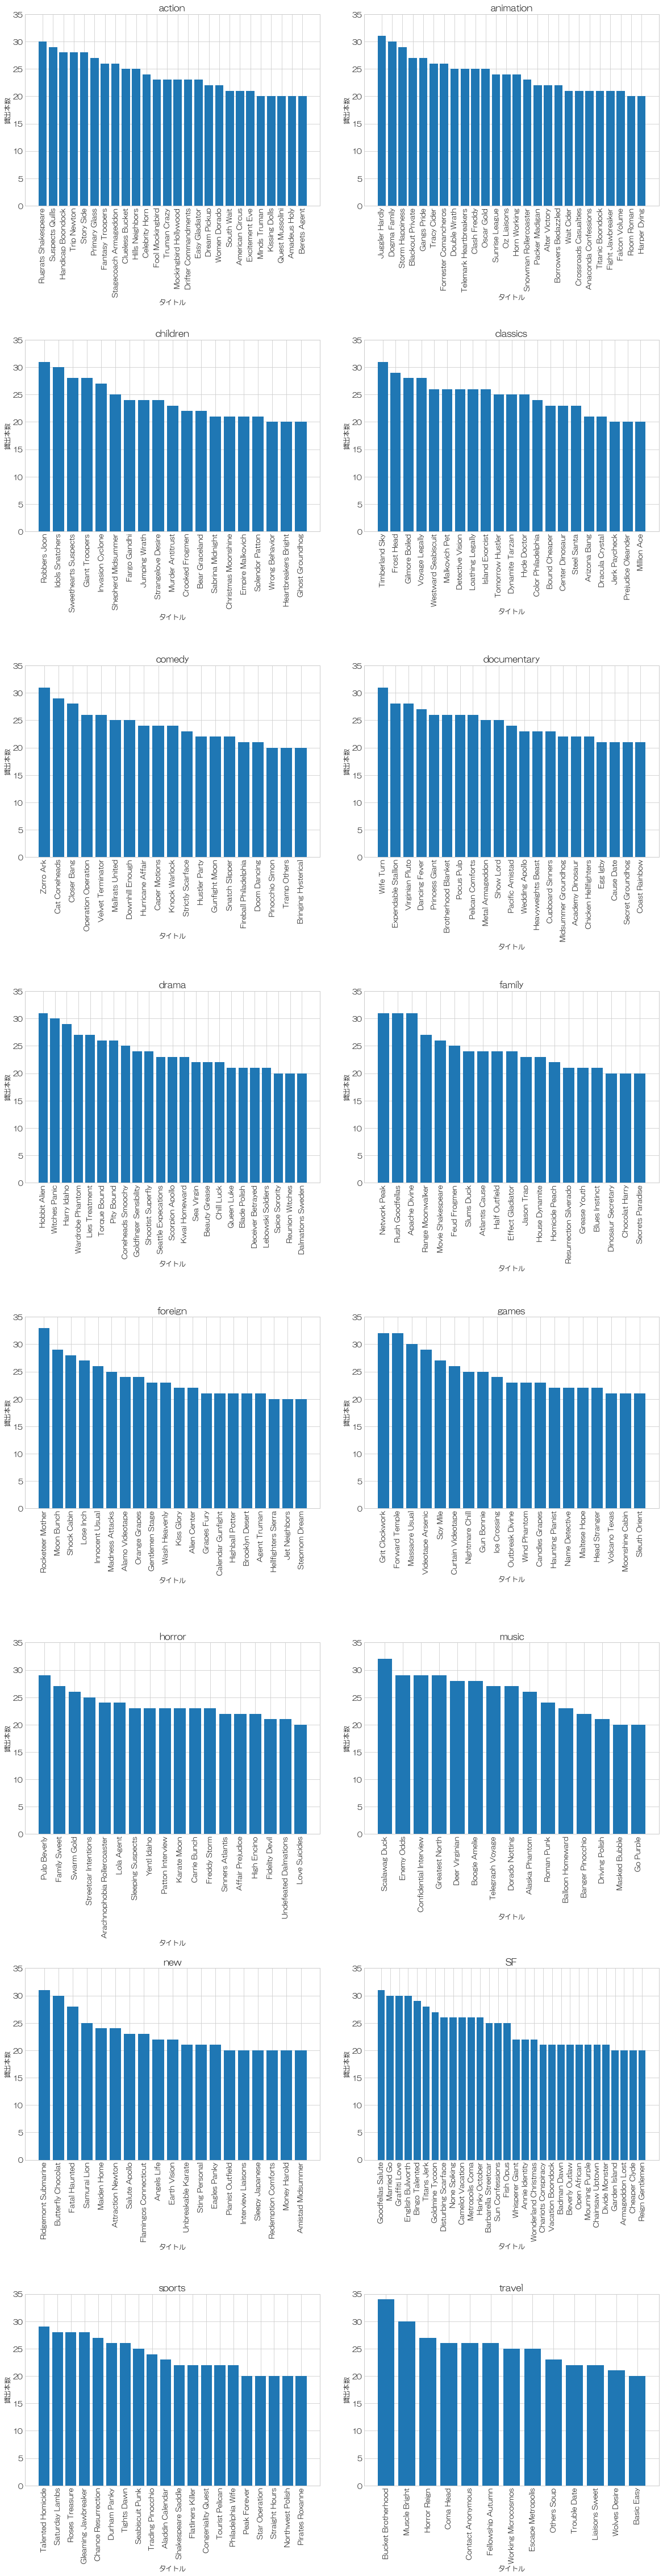

In [14]:
plt.figure(figsize=(20, 80))
plt.subplots_adjust(wspace=0.15, hspace=0.7)
pdf = PdfPages('カテゴリー別貸出本数.pdf')

plt.subplot(8, 2, 1)
plt.bar(range(0,26),np.array(action["count"].head(26)))
plt.xticks(range(0,26),action.head(26).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("action", fontsize=15)

plt.subplot(8, 2, 2)
plt.bar(range(0,26),np.array(animation["count"].head(26)))
plt.xticks(range(0,26),animation.head(26).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("animation", fontsize=15)

plt.subplot(8, 2, 3)
plt.bar(range(0,19),np.array(children["count"].head(19)))
plt.xticks(range(0,19),children.head(19).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("children", fontsize=15)

plt.subplot(8, 2, 4)
plt.bar(range(0,21),np.array(classics["count"].head(21)))
plt.xticks(range(0,21),classics.head(21).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("classics", fontsize=15)

plt.subplot(8, 2, 5)
plt.bar(range(0,19),np.array(comedy["count"].head(19)))
plt.xticks(range(0,19),comedy.head(19).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("comedy", fontsize=15)

plt.subplot(8, 2, 6)
plt.bar(range(0,21),np.array(documentary["count"].head(21)))
plt.xticks(range(0,21),documentary.head(21).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("documentary", fontsize=15)

plt.subplot(8, 2, 7)
plt.bar(range(0,23),np.array(drama["count"].head(23)))
plt.xticks(range(0,23),drama.head(23).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("drama", fontsize=15)

plt.subplot(8, 2, 8)
plt.bar(range(0,19),np.array(family["count"].head(19)))
plt.xticks(range(0,19),family.head(19).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("family", fontsize=15)

plt.subplot(8, 2, 9)
plt.bar(range(0,20),np.array(foreign["count"].head(20)))
plt.xticks(range(0,20),foreign.head(20).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("foreign", fontsize=15)

plt.subplot(8, 2, 10)
plt.bar(range(0,19),np.array(games["count"].head(19)))
plt.xticks(range(0,19),games.head(19).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("games", fontsize=15)

plt.subplot(8, 2, 11)
plt.bar(range(0,18),np.array(horror["count"].head(18)))
plt.xticks(range(0,18),horror.head(18).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("horror", fontsize=15)

plt.subplot(8, 2, 12)
plt.bar(range(0,15),np.array(music["count"].head(15)))
plt.xticks(range(0,15),music.head(15).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("music", fontsize=15)

plt.subplot(8, 2, 13)
plt.bar(range(0,19),np.array(new["count"].head(19)))
plt.xticks(range(0,19),new.head(19).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("new", fontsize=15)

plt.subplot(8, 2, 14)
plt.bar(range(0,30),np.array(schfi["count"].head(30)))
plt.xticks(range(0,30),schfi.head(30).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("SF", fontsize=15)

plt.subplot(8, 2, 15)
plt.bar(range(0,20),np.array(sports["count"].head(20)))
plt.xticks(range(0,20),sports.head(20).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("sports", fontsize=15)

plt.subplot(8, 2, 16)
plt.bar(range(0,13),np.array(travel["count"].head(13)))
plt.xticks(range(0,13),travel.head(13).index,rotation = 90)
plt.ylim([0,35])
plt.xlabel("タイトル")
plt.ylabel("貸出本数")
plt.title("travel", fontsize=15)

pdf.savefig()
pdf.close()
plt.show()

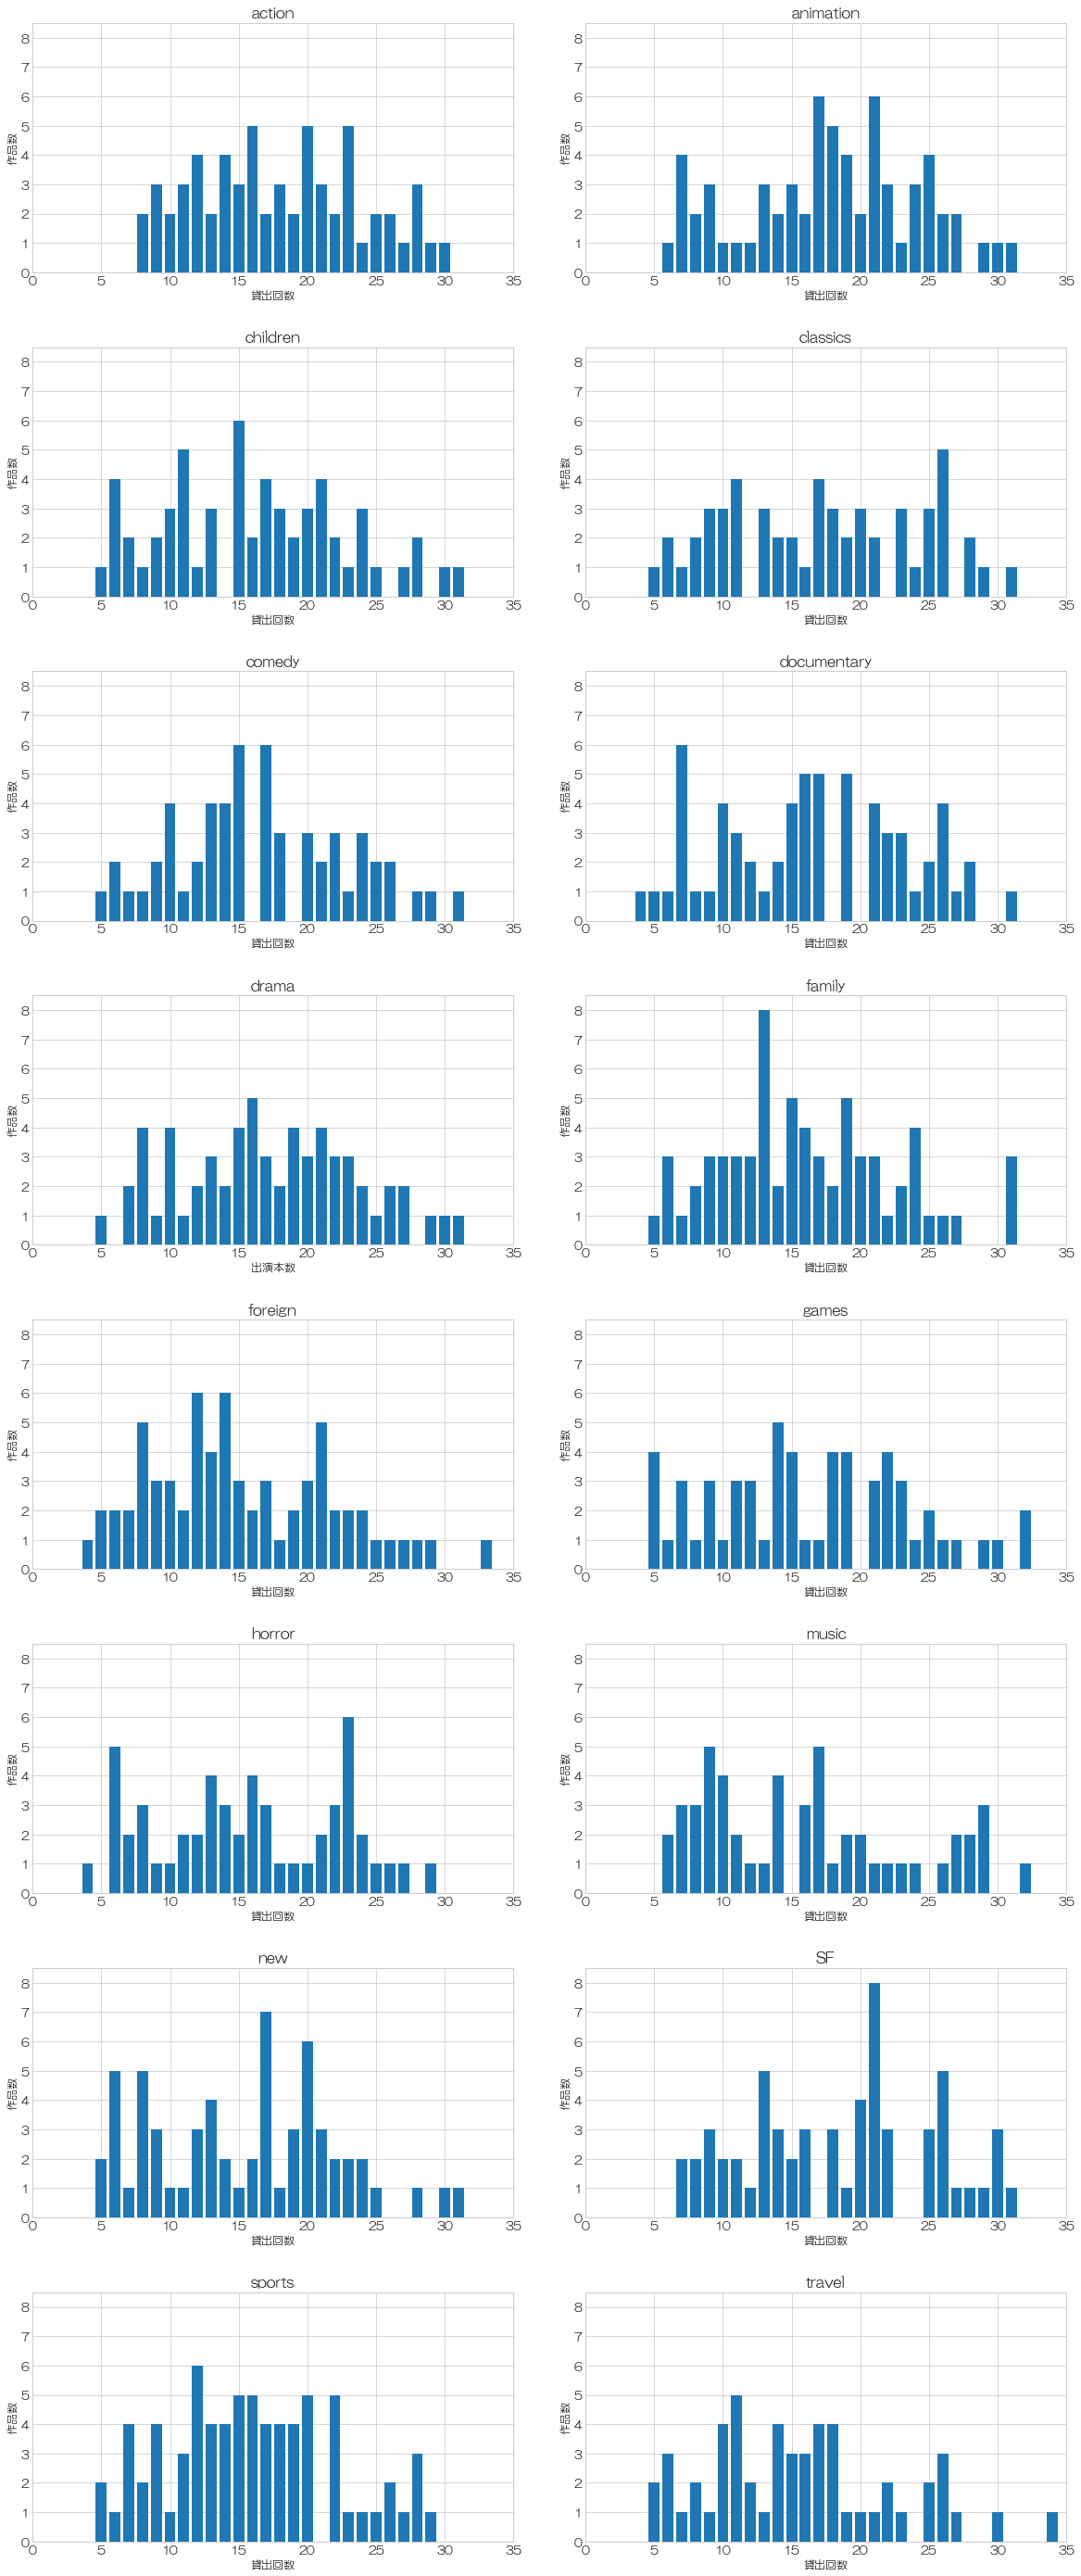

In [15]:
plt.figure(figsize=(20, 50))
plt.subplots_adjust(wspace=0.15, hspace=0.3)
pdf = PdfPages('貸出回数と作品数.pdf')

plt.subplot(8, 2, 1)
plt.bar(action["count"].value_counts().sort_index().index,np.array(action["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("action", fontsize=15)

plt.subplot(8, 2, 2)
plt.bar(animation["count"].value_counts().sort_index().index,np.array(animation["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("animation", fontsize=15)

plt.subplot(8, 2, 3)
plt.bar(children["count"].value_counts().sort_index().index,np.array(children["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("children", fontsize=15)

plt.subplot(8, 2, 4)
plt.bar(classics["count"].value_counts().sort_index().index,np.array(classics["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("classics", fontsize=15)

plt.subplot(8, 2, 5)
plt.bar(comedy["count"].value_counts().sort_index().index,np.array(comedy["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("comedy", fontsize=15)

plt.subplot(8, 2, 6)
plt.bar(documentary["count"].value_counts().sort_index().index,np.array(documentary["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("documentary", fontsize=15)

plt.subplot(8, 2, 7)
plt.bar(drama["count"].value_counts().sort_index().index,np.array(drama["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("出演本数")
plt.ylabel("作品数")
plt.title("drama", fontsize=15)

plt.subplot(8, 2, 8)
plt.bar(family["count"].value_counts().sort_index().index,np.array(family["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("family", fontsize=15)

plt.subplot(8, 2, 9)
plt.bar(foreign["count"].value_counts().sort_index().index,np.array(foreign["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("foreign", fontsize=15)

plt.subplot(8, 2, 10)
plt.bar(games["count"].value_counts().sort_index().index,np.array(games["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("games", fontsize=15)

plt.subplot(8, 2, 11)
plt.bar(horror["count"].value_counts().sort_index().index,np.array(horror["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("horror", fontsize=15)

plt.subplot(8, 2, 12)
plt.bar(music["count"].value_counts().sort_index().index,np.array(music["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("music", fontsize=15)

plt.subplot(8, 2, 13)
plt.bar(new["count"].value_counts().sort_index().index,np.array(new["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("new", fontsize=15)

plt.subplot(8, 2, 14)
plt.bar(schfi["count"].value_counts().sort_index().index,np.array(schfi["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("SF", fontsize=15)

plt.subplot(8, 2, 15)
plt.bar(sports["count"].value_counts().sort_index().index,np.array(sports["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("sports", fontsize=15)

plt.subplot(8, 2, 16)
plt.bar(travel["count"].value_counts().sort_index().index,np.array(travel["count"].value_counts().sort_index()))
plt.xlim([0,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("travel", fontsize=15)

pdf.savefig()
pdf.close()
plt.show()

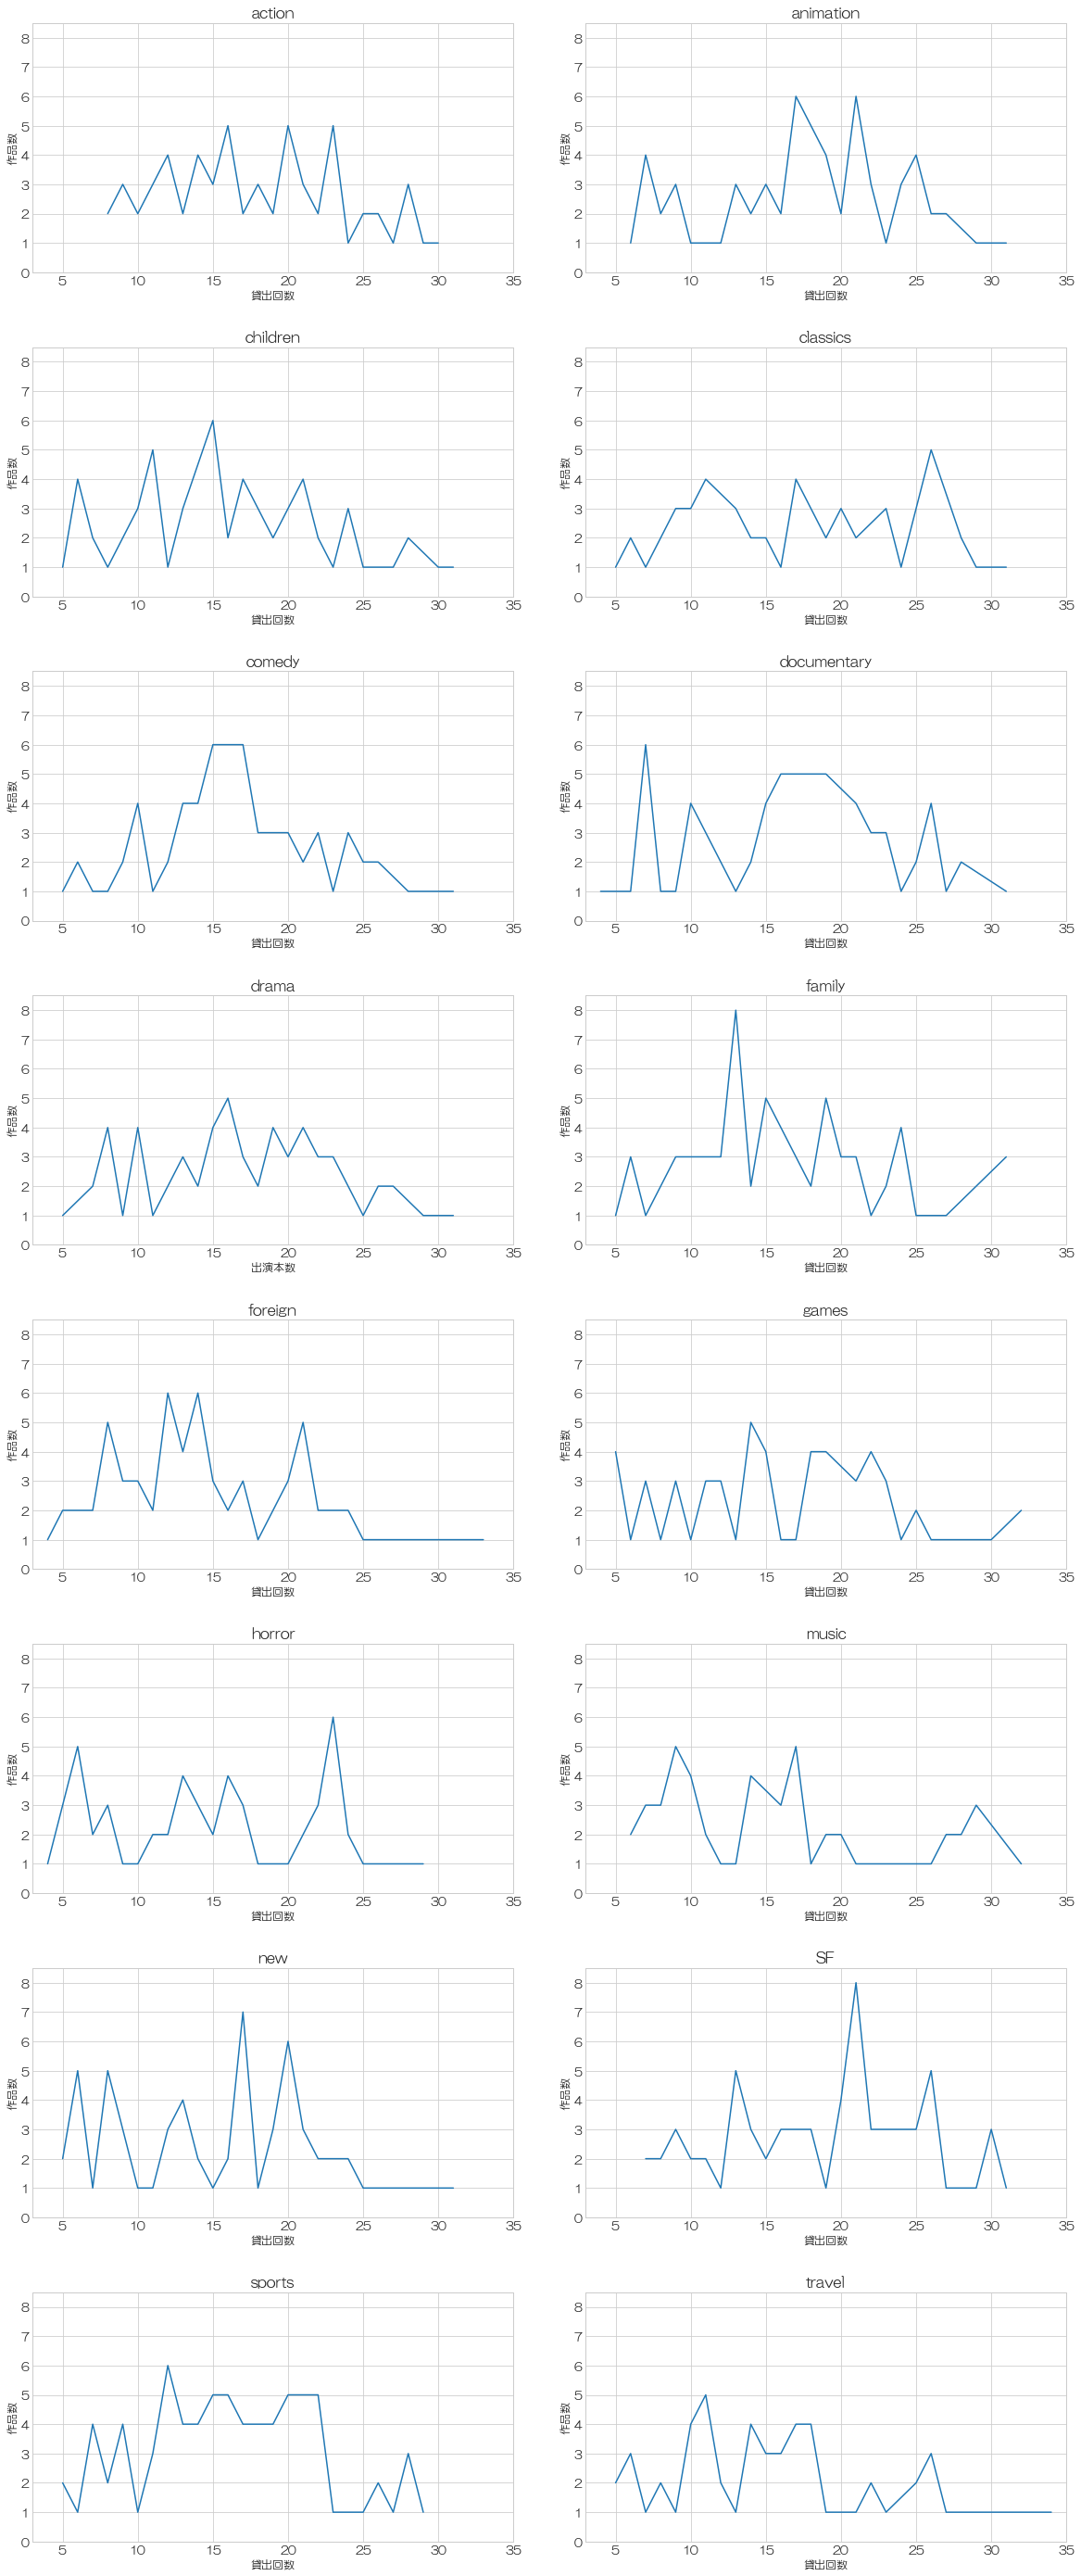

In [18]:
plt.figure(figsize=(20, 50))
plt.subplots_adjust(wspace=0.15, hspace=0.3)
pdf = PdfPages('貸出回数と作品数_2.pdf')

plt.subplot(8, 2, 1)
plt.plot(action["count"].value_counts().sort_index().index,np.array(action["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("action", fontsize=15)

plt.subplot(8, 2, 2)
plt.plot(animation["count"].value_counts().sort_index().index,np.array(animation["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("animation", fontsize=15)

plt.subplot(8, 2, 3)
plt.plot(children["count"].value_counts().sort_index().index,np.array(children["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("children", fontsize=15)

plt.subplot(8, 2, 4)
plt.plot(classics["count"].value_counts().sort_index().index,np.array(classics["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("classics", fontsize=15)

plt.subplot(8, 2, 5)
plt.plot(comedy["count"].value_counts().sort_index().index,np.array(comedy["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("comedy", fontsize=15)

plt.subplot(8, 2, 6)
plt.plot(documentary["count"].value_counts().sort_index().index,np.array(documentary["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("documentary", fontsize=15)

plt.subplot(8, 2, 7)
plt.plot(drama["count"].value_counts().sort_index().index,np.array(drama["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("出演本数")
plt.ylabel("作品数")
plt.title("drama", fontsize=15)

plt.subplot(8, 2, 8)
plt.plot(family["count"].value_counts().sort_index().index,np.array(family["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("family", fontsize=15)

plt.subplot(8, 2, 9)
plt.plot(foreign["count"].value_counts().sort_index().index,np.array(foreign["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("foreign", fontsize=15)

plt.subplot(8, 2, 10)
plt.plot(games["count"].value_counts().sort_index().index,np.array(games["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("games", fontsize=15)

plt.subplot(8, 2, 11)
plt.plot(horror["count"].value_counts().sort_index().index,np.array(horror["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("horror", fontsize=15)

plt.subplot(8, 2, 12)
plt.plot(music["count"].value_counts().sort_index().index,np.array(music["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("music", fontsize=15)

plt.subplot(8, 2, 13)
plt.plot(new["count"].value_counts().sort_index().index,np.array(new["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("new", fontsize=15)

plt.subplot(8, 2, 14)
plt.plot(schfi["count"].value_counts().sort_index().index,np.array(schfi["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("SF", fontsize=15)

plt.subplot(8, 2, 15)
plt.plot(sports["count"].value_counts().sort_index().index,np.array(sports["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("sports", fontsize=15)

plt.subplot(8, 2, 16)
plt.plot(travel["count"].value_counts().sort_index().index,np.array(travel["count"].value_counts().sort_index()))
plt.xlim([3,35])
plt.ylim([0,8.5])
plt.xlabel("貸出回数")
plt.ylabel("作品数")
plt.title("travel", fontsize=15)

pdf.savefig()
pdf.close()
plt.show()

In [19]:
# 各カテゴリー全作品の出演俳優の情報を追加
df_ac = pd.read_csv("./data/actor_category.csv").rename(columns={"film_id": "count"})
# 各カテゴリー上位20作の出演俳優の情報を追加
df_ac_t20 = pd.read_csv("./data/actor_category_t20.csv").rename(columns={"film_id": "count"})

In [20]:
# 全作品における出演本数ランキング
df_ac.groupby(["actor","actor_id"]).count().iloc[:, [0]].sort_values("count", ascending=False)

,,count
actor,actor_id,
GinaDegeneres,107,42
MaryKeitel,198,40
WalterTorn,102,39
MatthewCarrey,181,37
SandraKilmer,23,36
ScarlettDamon,81,35
HenryBerry,60,35
VivienBasinger,158,35
ValBolger,37,35


In [21]:
# 各カテゴリーの出演本数ランキング（全作品）
df_action2 = df_ac[df_ac["category"] == columns[0]].reset_index(drop = True)
df_animation2 = df_ac[df_ac["category"] == columns[1]].reset_index(drop = True)
df_children2 = df_ac[df_ac["category"] == columns[2]].reset_index(drop = True)
df_classics2 = df_ac[df_ac["category"] == columns[3]].reset_index(drop = True)
df_comedy2 = df_ac[df_ac["category"] == columns[4]].reset_index(drop = True)
df_documentary2 = df_ac[df_ac["category"] == columns[5]].reset_index(drop = True)
df_drama2 = df_ac[df_ac["category"] == columns[6]].reset_index(drop = True)
df_family2 = df_ac[df_ac["category"] == columns[7]].reset_index(drop = True)
df_foreign2 = df_ac[df_ac["category"] == columns[8]].reset_index(drop = True)
df_games2 = df_ac[df_ac["category"] == columns[9]].reset_index(drop = True)
df_horror2 = df_ac[df_ac["category"] == columns[10]].reset_index(drop = True)
df_music2 = df_ac[df_ac["category"] == columns[11]].reset_index(drop = True)
df_new2 = df_ac[df_ac["category"] == columns[12]].reset_index(drop = True)
df_schfi2 = df_ac[df_ac["category"] == columns[13]].reset_index(drop = True)
df_sports2 = df_ac[df_ac["category"] == columns[14]].reset_index(drop = True)
df_travel2 = df_ac[df_ac["category"] == columns[15]].reset_index(drop = True)

In [22]:
# 全作品
action2 = df_action2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
animation2 = df_animation2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
children2 = df_children2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
classics2 = df_classics2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
comedy2 = df_comedy2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
documentary2 = df_documentary2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
drama2 = df_drama2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
family2 = df_family2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
foreign2 = df_foreign2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
games2 = df_games2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
horror2 = df_horror2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
music2 = df_music2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
new2 = df_new2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
schfi2 = df_schfi2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
sports2 = df_sports2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
travel2 = df_travel2.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)

In [24]:
# 全作品
df_ac.groupby(["actor","actor_id"]).count().iloc[:, [0]].sort_values("count", ascending=False).to_csv('df_ac.csv')
action2.to_csv('action2.csv')
animation2.to_csv('animation2.csv')
children2.to_csv('children2.csv')
classics2.to_csv('classics2.csv')
comedy2.to_csv('comedy2.csv')
documentary2.to_csv('documentary2.csv')
drama2.to_csv('drama2.csv')
family2.to_csv('family2.csv')
foreign2.to_csv('foreign2.csv')
games2.to_csv('games2.csv')
horror2.to_csv('horror2.csv')
music2.to_csv('music2.csv')
new2.to_csv('new2.csv')
schfi2.to_csv('schfi2.csv')
sports2.to_csv('sports2.csv')
travel2.to_csv('travel2.csv')

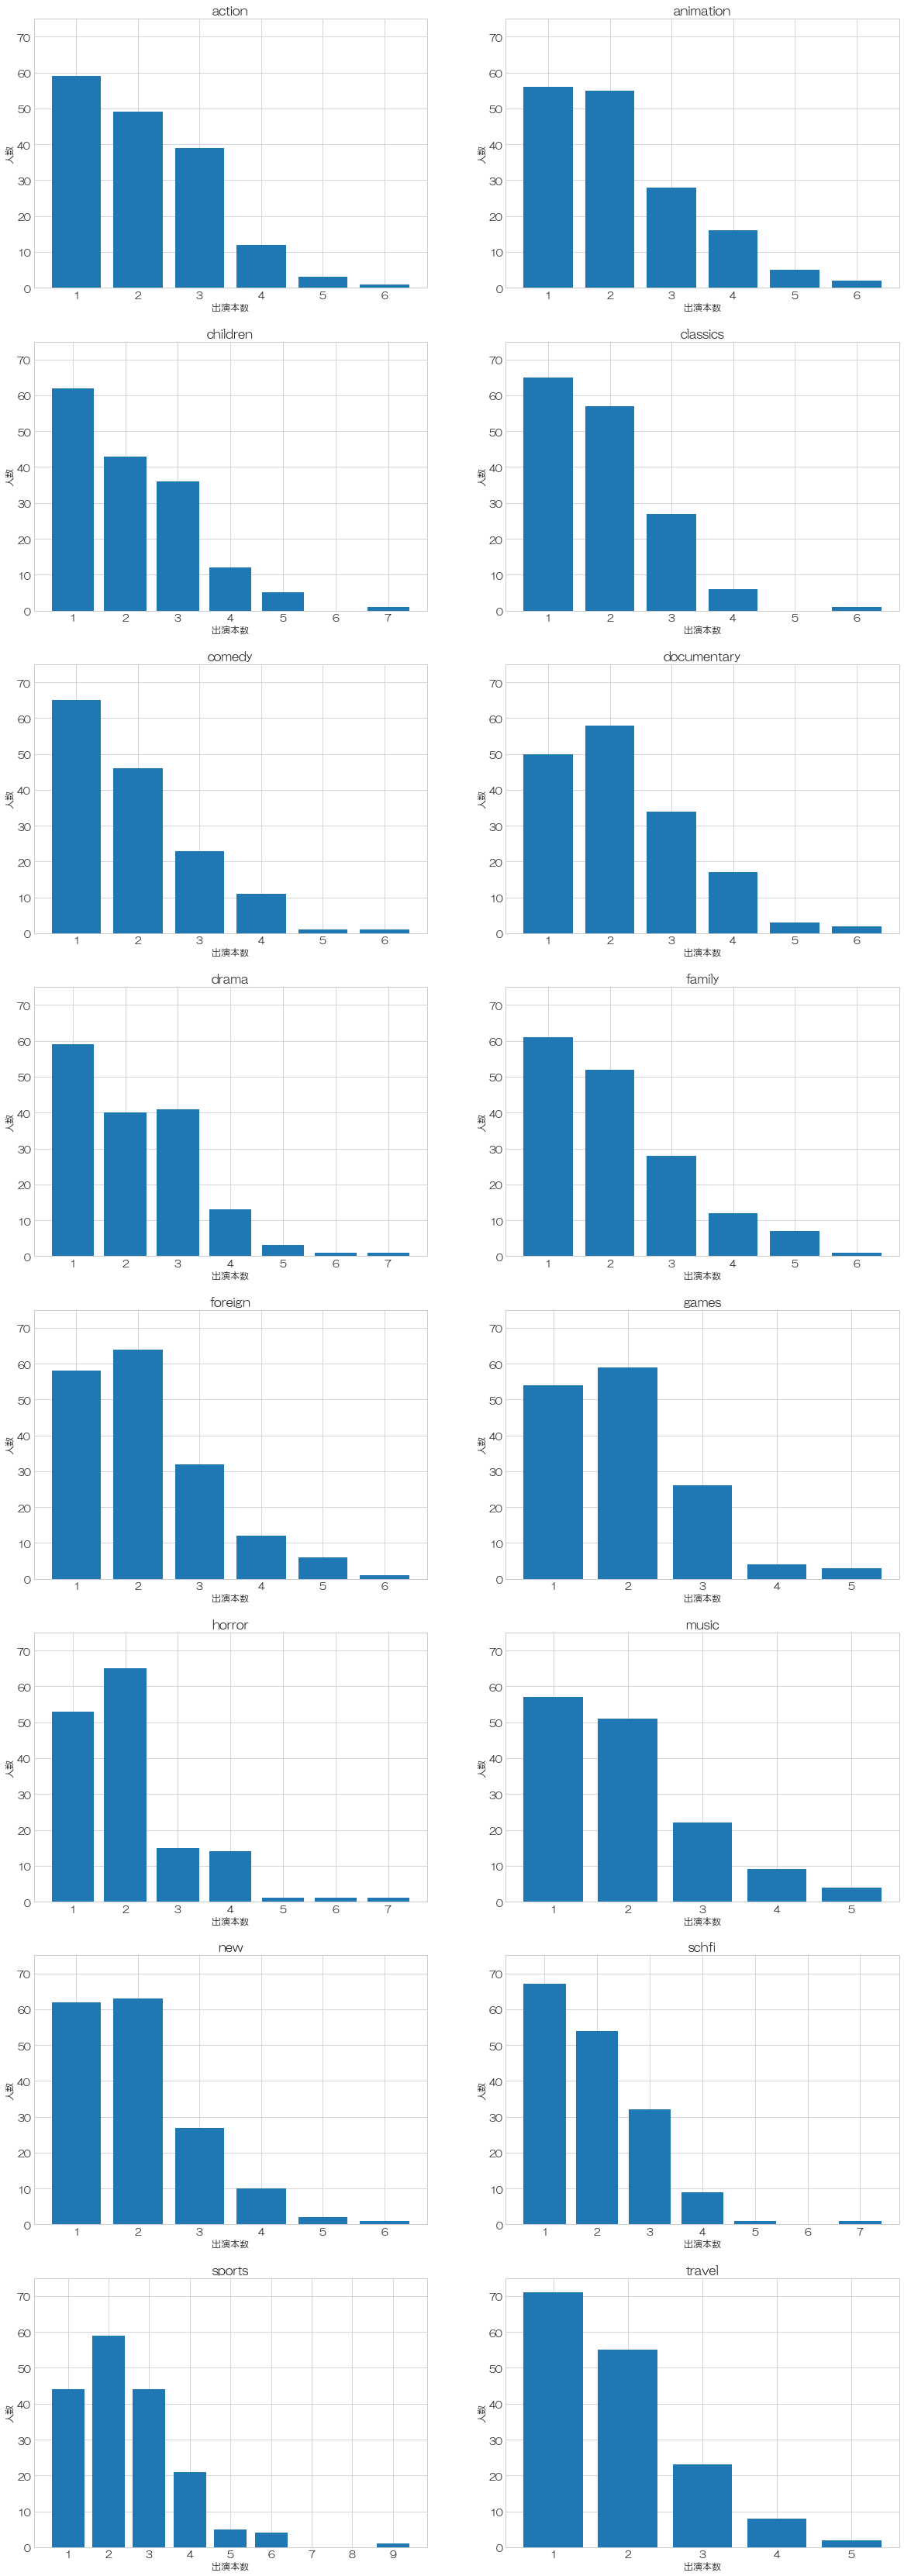

In [23]:
plt.figure(figsize=(20, 60))
pdf = PdfPages('カテゴリー別の出演本数と人数.pdf')

plt.subplot(8, 2, 1)
plt.bar(action2["count"].value_counts().sort_index().index,np.array(action2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("action", fontsize=15)

plt.subplot(8, 2, 2)
plt.bar(animation2["count"].value_counts().sort_index().index,np.array(animation2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("animation", fontsize=15)

plt.subplot(8, 2, 3)
plt.bar(children2["count"].value_counts().sort_index().index,np.array(children2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("children", fontsize=15)

plt.subplot(8, 2, 4)
plt.bar(classics2["count"].value_counts().sort_index().index,np.array(classics2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("classics", fontsize=15)

plt.subplot(8, 2, 5)
plt.bar(comedy2["count"].value_counts().sort_index().index,np.array(comedy2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("comedy", fontsize=15)

plt.subplot(8, 2, 6)
plt.bar(documentary2["count"].value_counts().sort_index().index,np.array(documentary2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("documentary", fontsize=15)

plt.subplot(8, 2, 7)
plt.bar(drama2["count"].value_counts().sort_index().index,np.array(drama2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("drama", fontsize=15)

plt.subplot(8, 2, 8)
plt.bar(family2["count"].value_counts().sort_index().index,np.array(family2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("family", fontsize=15)

plt.subplot(8, 2, 9)
plt.bar(foreign2["count"].value_counts().sort_index().index,np.array(foreign2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("foreign", fontsize=15)

plt.subplot(8, 2, 10)
plt.bar(games2["count"].value_counts().sort_index().index,np.array(games2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("games", fontsize=15)

plt.subplot(8, 2, 11)
plt.bar(horror2["count"].value_counts().sort_index().index,np.array(horror2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("horror", fontsize=15)

plt.subplot(8, 2, 12)
plt.bar(music2["count"].value_counts().sort_index().index,np.array(music2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("music", fontsize=15)

plt.subplot(8, 2, 13)
plt.bar(new2["count"].value_counts().sort_index().index,np.array(new2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("new", fontsize=15)

plt.subplot(8, 2, 14)
plt.bar(schfi2["count"].value_counts().sort_index().index,np.array(schfi2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("schfi", fontsize=15)

plt.subplot(8, 2, 15)
plt.bar(sports2["count"].value_counts().sort_index().index,np.array(sports2["count"].value_counts().sort_index()))
plt.xticks([1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9])
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("sports", fontsize=15)

plt.subplot(8, 2, 16)
plt.bar(travel2["count"].value_counts().sort_index().index,np.array(travel2["count"].value_counts().sort_index()))
plt.ylim([0,75])
plt.xlabel("出演本数")
plt.ylabel("人数")
plt.title("travel", fontsize=15)

pdf.savefig()
pdf.close()
plt.show()

In [24]:
# 各カテゴリー上位20作品における出演本数ランキング
df_ac_t20.groupby(["actor","actor_id"]).count().iloc[:, [0]].sort_values(
    "count", ascending=False)

,,count
actor,actor_id,
KevinGarland,127,17
AngelaHudson,65,16
SeanGuiness,90,16
MichaelBolger,185,15
GinaDegeneres,107,15
AngelaWitherspoon,144,15
MatthewCarrey,181,15
JayneNeeson,62,14
SidneyCrowe,105,14


In [25]:
# 各カテゴリーの出演本数（上位20作品）
df_action_t20 = df_ac_t20[df_ac_t20["category"] == columns[0]].reset_index(drop = True)
df_animation_t20 = df_ac_t20[df_ac_t20["category"] == columns[1]].reset_index(drop = True)
df_children_t20 = df_ac_t20[df_ac_t20["category"] == columns[2]].reset_index(drop = True)
df_classics_t20 = df_ac_t20[df_ac_t20["category"] == columns[3]].reset_index(drop = True)
df_comedy_t20 = df_ac_t20[df_ac_t20["category"] == columns[4]].reset_index(drop = True)
df_documentary_t20 = df_ac_t20[df_ac_t20["category"] == columns[5]].reset_index(drop = True)
df_drama_t20 = df_ac_t20[df_ac_t20["category"] == columns[6]].reset_index(drop = True)
df_family_t20 = df_ac_t20[df_ac_t20["category"] == columns[7]].reset_index(drop = True)
df_foreign_t20 = df_ac_t20[df_ac_t20["category"] == columns[8]].reset_index(drop = True)
df_games_t20 = df_ac_t20[df_ac_t20["category"] == columns[9]].reset_index(drop = True)
df_horror_t20 = df_ac_t20[df_ac_t20["category"] == columns[10]].reset_index(drop = True)
df_music_t20 = df_ac_t20[df_ac_t20["category"] == columns[11]].reset_index(drop = True)
df_new_t20 = df_ac_t20[df_ac_t20["category"] == columns[12]].reset_index(drop = True)
df_schfi_t20 = df_ac_t20[df_ac_t20["category"] == columns[13]].reset_index(drop = True)
df_sports_t20 = df_ac_t20[df_ac_t20["category"] == columns[14]].reset_index(drop = True)
df_travel_t20 = df_ac_t20[df_ac_t20["category"] == columns[15]].reset_index(drop = True)

In [26]:
# 上位20作品
action_t20 = df_action_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
animation_t20 = df_animation_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
children_t20 = df_children_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
classics_t20 = df_classics_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
comedy_t20 = df_comedy_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
documentary_t20 = df_documentary_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
drama_t20 = df_drama_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
family_t20 = df_family_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
foreign_t20 = df_foreign_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
games_t20 = df_games_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
horror_t20 = df_horror_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
music_t20 = df_music_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
new_t20 = df_new_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
schfi_t20 = df_schfi_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
sports_t20 = df_sports_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)
travel_t20 = df_travel_t20.groupby("actor").count().iloc[:, [0]].sort_values("count", ascending=False)

In [29]:
# 上位20作品
df_ac_t20.groupby(["actor","actor_id"]).count().iloc[:, [0]].sort_values("count", ascending=False).to_csv('df_ac_t20.csv')
action_t20.to_csv('action_t20.csv')
animation_t20.to_csv('animation_t20.csv')
children_t20.to_csv('children_t20.csv')
classics_t20.to_csv('classics_t20.csv')
comedy_t20.to_csv('comedy_t20.csv')
documentary_t20.to_csv('documentary_t20.csv')
drama_t20.to_csv('drama_t20.csv')
family_t20.to_csv('family_t20.csv')
foreign_t20.to_csv('foreign_t20.csv')
games_t20.to_csv('games_t20.csv')
horror_t20.to_csv('horror_t20.csv')
music_t20.to_csv('music_t20.csv')
new_t20.to_csv('new_t20.csv')
schfi_t20.to_csv('schfi_t20.csv')
sports_t20.to_csv('sports_t20.csv')
travel_t20.to_csv('travel_t20.csv')

In [28]:
date = pd.read_csv("./data/date.csv")
date["day"] = pd.to_datetime(date['day'])

In [29]:
action_time = pd.merge(date, df_action.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
animation_time = pd.merge(date, df_animation.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
children_time = pd.merge(date, df_children.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
classics_time = pd.merge(date, df_classics.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
comedy_time = pd.merge(date, df_comedy.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
documentary_time = pd.merge(date, df_documentary.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
drama_time = pd.merge(date, df_drama.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
family_time = pd.merge(date, df_family.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
foreign_time = pd.merge(date, df_foreign.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
games_time = pd.merge(date, df_games.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
horror_time = pd.merge(date, df_horror.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
music_time = pd.merge(date, df_music.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
new_time = pd.merge(date, df_new.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
schfi_time = pd.merge(date, df_schfi.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
sports_time = pd.merge(date, df_sports.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)
travel_time = pd.merge(date, df_travel.groupby("rental_date").count().iloc[:, [0]].reset_index(), how="left", left_on="day", right_on="rental_date").rename(columns={"customer_id": "count"}).fillna({"count": 0}).drop(["rental_date"], axis=1)

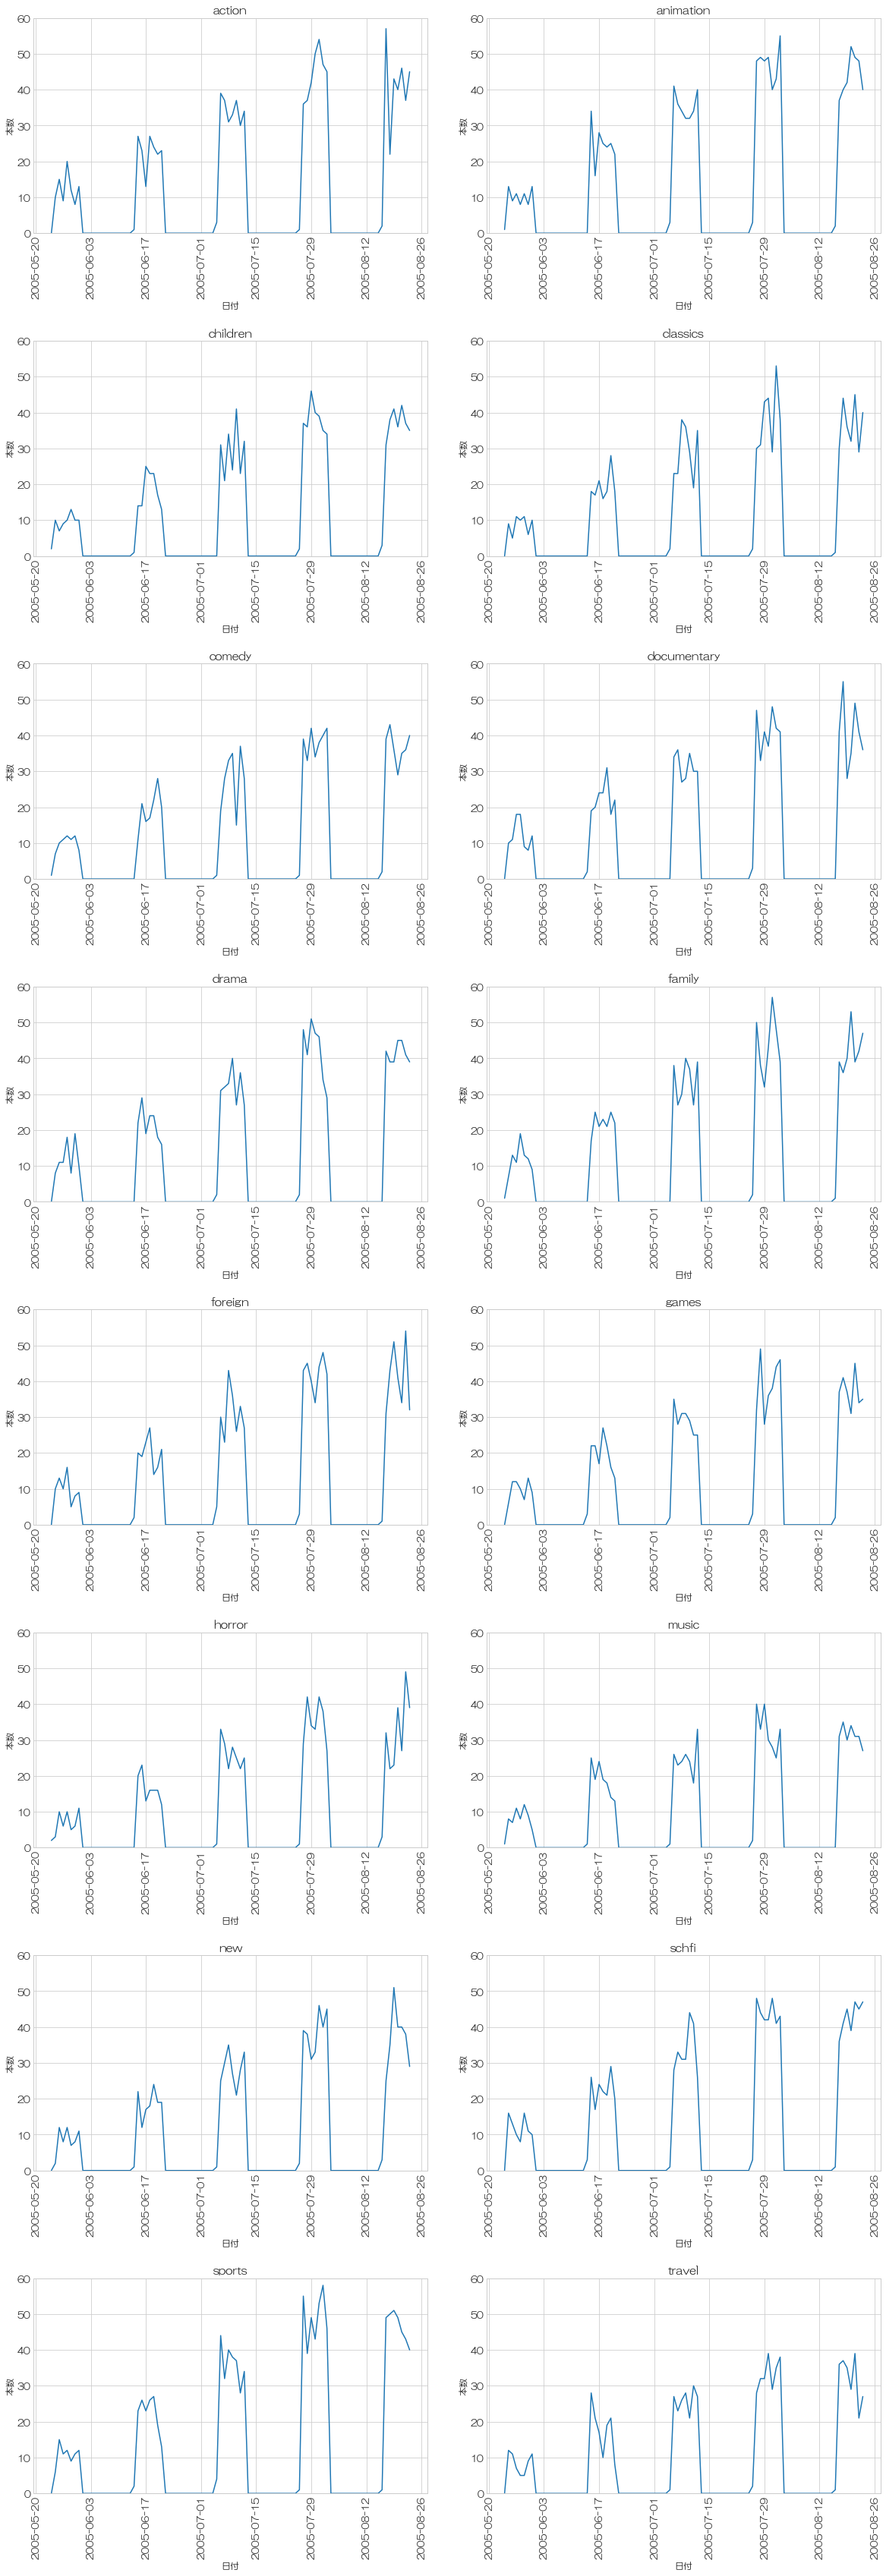

In [30]:
plt.figure(figsize=(20, 60))
plt.subplots_adjust(wspace=0.15, hspace=0.5)
pdf = PdfPages('各カテゴリーの貸出本数の推移.pdf')

plt.subplot(8, 2, 1)
plt.plot(action_time["day"],action_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("action")

plt.subplot(8, 2, 2)
plt.plot(animation_time["day"],animation_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("animation")

plt.subplot(8, 2, 3)
plt.plot(children_time["day"],children_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("children")

plt.subplot(8, 2, 4)
plt.plot(classics_time["day"],classics_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("classics")

plt.subplot(8, 2, 5)
plt.plot(comedy_time["day"],comedy_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("comedy")

plt.subplot(8, 2, 6)
plt.plot(documentary_time["day"],documentary_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("documentary")

plt.subplot(8, 2, 7)
plt.plot(drama_time["day"],drama_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("drama")

plt.subplot(8, 2, 8)
plt.plot(family_time["day"],family_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("family")

plt.subplot(8, 2, 9)
plt.plot(foreign_time["day"],foreign_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("foreign")

plt.subplot(8, 2, 10)
plt.plot(games_time["day"],games_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("games")

plt.subplot(8, 2, 11)
plt.plot(horror_time["day"],horror_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("horror")

plt.subplot(8, 2, 12)
plt.plot(music_time["day"],music_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("music")

plt.subplot(8, 2, 13)
plt.plot(new_time["day"],new_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("new")

plt.subplot(8, 2, 14)
plt.plot(schfi_time["day"],schfi_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("schfi")

plt.subplot(8, 2, 15)
plt.plot(sports_time["day"],sports_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("sports")

plt.subplot(8, 2, 16)
plt.plot(travel_time["day"],travel_time["count"])
plt.xticks(rotation = 90)
plt.ylim([0,60])
plt.xlabel("日付")
plt.ylabel("本数")
plt.title("travel")

pdf.savefig()
pdf.close()
plt.show()

# 主成分分析・K-means法

## データ編集

In [47]:
rental_data = pd.read_csv("./rental_data.csv").set_index("film_title")

In [48]:
lst_break = [-np.inf, 60, 120, 180, np.inf]
lst_label = ["1時間以下", "1～2時間", "2～3時間", "3時間～"]
v_timecut = pd.cut(x=rental_data["length"], bins=lst_break, labels=lst_label)
rental_data = rental_data.assign(timecut=v_timecut).drop(["length"], axis=1)

In [49]:
rental_data["category_name"] = rental_data["category_name"].astype("category")
rental_data["timecut"] = rental_data["timecut"].astype("category")

In [50]:
rental_data = pd.get_dummies(rental_data)

In [51]:
# 主成分分析のクラス
from sklearn.decomposition import PCA
# kmeans法のクラス
from sklearn.cluster import KMeans

In [52]:
rental_data.columns

Index(['rental_count', 'category_name_Action', 'category_name_Animation',
       'category_name_Children', 'category_name_Classics',
       'category_name_Comedy', 'category_name_Documentary',
       'category_name_Drama', 'category_name_Family', 'category_name_Foreign',
       'category_name_Games', 'category_name_Horror', 'category_name_Music',
       'category_name_New', 'category_name_Sci-Fi', 'category_name_Sports',
       'category_name_Travel', 'timecut_1時間以下', 'timecut_1～2時間',
       'timecut_2～3時間', 'timecut_3時間～'],
      dtype='object')

In [53]:
feature_x = ['rental_count', 'category_name_Action', 'category_name_Animation',
             'category_name_Children', 'category_name_Classics',
             'category_name_Comedy', 'category_name_Documentary',
             'category_name_Drama', 'category_name_Family', 'category_name_Foreign',
             'category_name_Games', 'category_name_Horror', 'category_name_Music',
             'category_name_New', 'category_name_Sci-Fi', 'category_name_Sports',
             'category_name_Travel', 'timecut_1時間以下', 'timecut_1～2時間',
             'timecut_2～3時間', 'timecut_3時間～']

In [83]:
rental_data.reset_index()

,film_title,rental_count,category_name_Action,category_name_Animation,category_name_Children,category_name_Classics,category_name_Comedy,category_name_Documentary,category_name_Drama,category_name_Family,...,category_name_Horror,category_name_Music,category_name_New,category_name_Sci-Fi,category_name_Sports,category_name_Travel,timecut_1時間以下,timecut_1～2時間,timecut_2～3時間,timecut_3時間～
0,Chamber Italian,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,Grosse Wonderful,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,Airport Pollock,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,Bright Encounters,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,Academy Dinosaur,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,Ace Goldfinger,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6,Adaptation Holes,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,Affair Prejudice,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8,African Egg,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9,Agent Truman,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 主成分分析_実行

In [54]:
pca = PCA()
decomposed = pca.fit_transform(rental_data[feature_x])
decomposed.shape

(958, 21)

In [55]:
# カラム名
cols = ['pc{}'.format(i+1) for i in range(decomposed.shape[1])]
decomposed = pd.DataFrame(decomposed, columns=cols)

In [56]:
np.round(pca.explained_variance_ratio_, 3)

array([0.252, 0.088, 0.085, 0.044, 0.041, 0.04 , 0.039, 0.038, 0.037,
       0.037, 0.036, 0.036, 0.035, 0.035, 0.033, 0.033, 0.032, 0.031,
       0.027, 0.   , 0.   ])

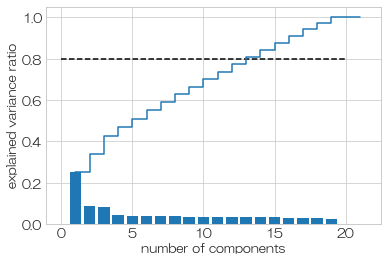

In [57]:
# 累積寄与率をプロット
# （13成分で全体の8割を説明できる）
x = range(1, len(pca.explained_variance_ratio_) + 1)                # x軸: 成分
plt.bar(x, pca.explained_variance_ratio_)                           # y軸: 寄与率（棒グラフ）
plt.step(x, np.cumsum(pca.explained_variance_ratio_), where='post') # y軸: 累積寄与率（折れ線グラフ）
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
plt.hlines(0.8, 0, 20, linestyles='dashed')
plt.show()

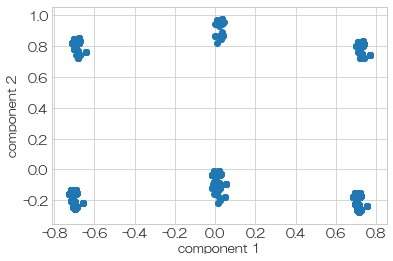

In [58]:
# 第1, 2成分を可視化
plt.scatter(decomposed.loc[:, 'pc1'], decomposed.loc[:, 'pc2'])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

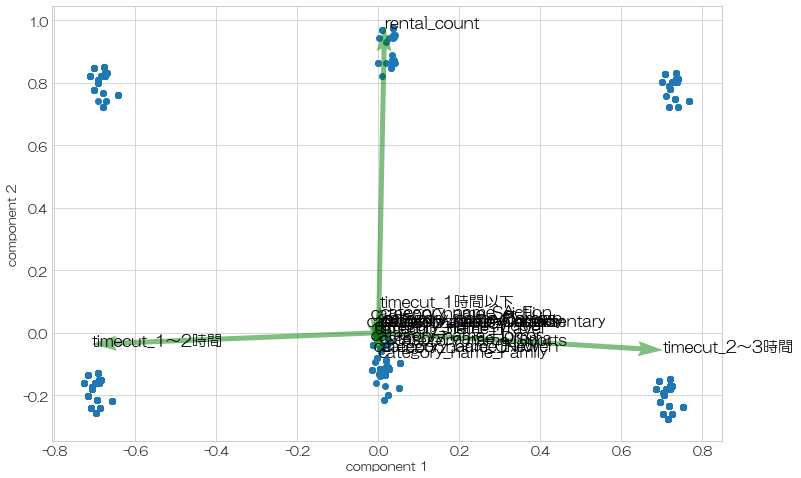

In [99]:
# 第1, 2成分を可視化
plt.figure(figsize=(12, 8))
plt.scatter(decomposed.iloc[:, 0], decomposed.iloc[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')

# 特徴量のラベルとベクトルをプロットする
xy_all = pca.components_[:2, :].T
for idx, xy in enumerate(xy_all):
    # 図をわかりやすくするためにベクトルを10倍にする
    x, y = xy# * 10
    # 特徴量のラベルをプロット
#    if idx in [0, 19]:
#         plt.text(x, y+0.5, s=str(feature_x[idx]), color='black', fontsize=15)
#    elif idx == 20:
#        plt.text(x, y-0.5, s=str(feature_x[idx]), color='black', fontsize=15)
#    else:
    plt.text(x, y, s=str(feature_x[idx]), color='black', fontsize=15)
    # ベクトルをプロット
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, alpha=0.5, color='green')


## K-means法

In [110]:
rental_data2 = rental_data.copy()
# モデリング
# クラスター数 3
clf = KMeans(n_clusters=4, random_state=1)
clf.fit(rental_data2)
# クラスタ
cluster = clf.labels_
rental_data2['C_number'] = clf.labels_ + 1

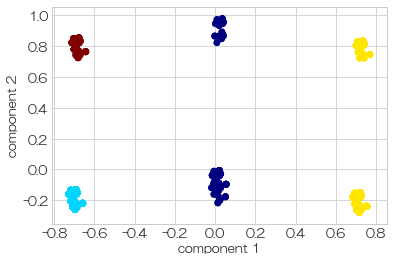

In [111]:
## 第1, 2成分を可視化（クラスタで色分け）
plt.scatter(decomposed.iloc[:, 0], decomposed.iloc[:, 1], c=cluster, cmap=mpl.cm.jet)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [112]:
rental_data2.groupby("C_number").sum()

,rental_count,category_name_Action,category_name_Animation,category_name_Children,category_name_Classics,category_name_Comedy,category_name_Documentary,category_name_Drama,category_name_Family,category_name_Foreign,...,category_name_Horror,category_name_Music,category_name_New,category_name_Sci-Fi,category_name_Sports,category_name_Travel,timecut_1時間以下,timecut_1～2時間,timecut_2～3時間,timecut_3時間～
C_number,,,,,,,,,,,,,,,,,,,,,
1,25,13.0,13.0,10.0,6.0,10.0,12.0,4.0,11.0,8.0,...,5.0,9.0,9.0,6.0,9.0,6.0,99.0,0.0,0.0,37.0
2,0,17.0,26.0,26.0,19.0,15.0,20.0,25.0,24.0,24.0,...,24.0,19.0,21.0,25.0,18.0,22.0,0.0,346.0,0.0,0.0
3,76,25.0,18.0,21.0,23.0,24.0,27.0,29.0,28.0,32.0,...,19.0,18.0,28.0,21.0,41.0,21.0,0.0,0.0,403.0,0.0
4,73,6.0,7.0,1.0,6.0,7.0,4.0,3.0,4.0,3.0,...,5.0,5.0,2.0,7.0,5.0,4.0,0.0,73.0,0.0,0.0


In [103]:
rental_data2.groupby("C_number").sum().to_excel('C_number2.xlsx')

In [124]:
data = pd.read_csv("./Book1.csv").set_index("cluster").drop(["num","u1","1~2","2~3","3~"],axis = 1).T

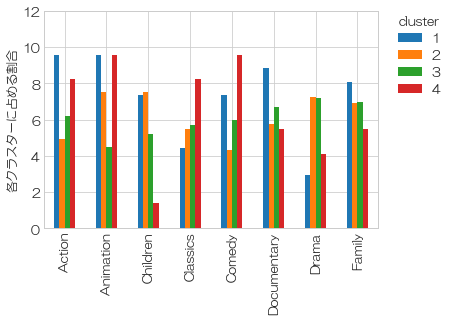

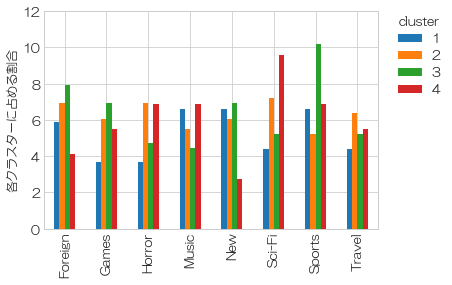

In [187]:
data.head(8).plot.bar()
plt.legend(loc="upper right",bbox_to_anchor=(0.7, 0.9, 0.5, .100), title = "cluster", borderaxespad=0.,)
plt.ylabel("各クラスターに占める割合")
plt.ylim([0,12])
data.tail(8).plot.bar()
plt.legend(loc="upper right",bbox_to_anchor=(0.7, 0.9, 0.5, .100), title = "cluster", borderaxespad=0.,)
plt.ylabel("各クラスターに占める割合")
plt.ylim([0,12])
plt.show()